In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [2]:
# تحميل البيانات
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
# تطبيع القيم (0 إلى 1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [4]:
# تحويل التصنيفات إلى One-hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# أسماء الفئات
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

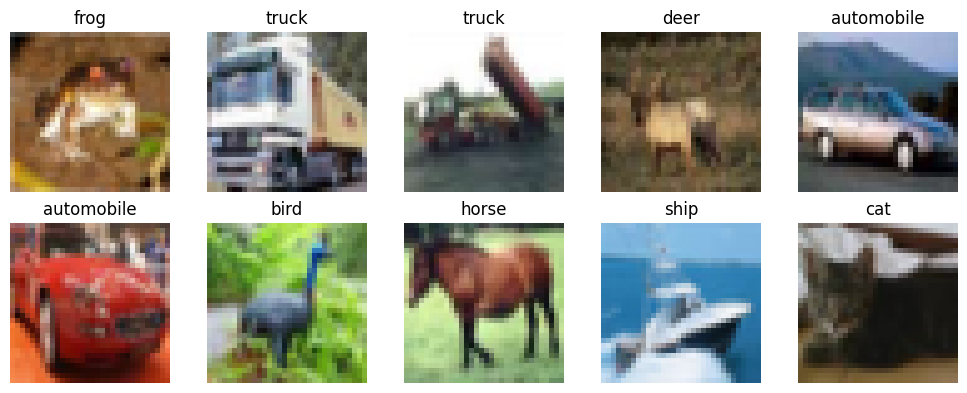

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[np.argmax(y_train[i])])
    plt.axis("off")
plt.tight_layout()
plt.show()


In [7]:
# إنشاء النموذج
model = models.Sequential()

# الطبقة الأولى: Conv2D
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# شرح: 32 فلتر (filter) بحجم 3x3 لتعلُّم الميزات من الصور، مع تفعيل ReLU

# الطبقة الثانية: MaxPooling
model.add(layers.MaxPooling2D((2, 2)))
#  تقليل حجم البيانات (Downsampling) للحفاظ على المعلومات الأهم

# طبقة ثالثة: Conv2D مرة ثانية
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#  استخراج ميزات أعمق من الصورة

# طبقة رابعة: MaxPooling ثانية
model.add(layers.MaxPooling2D((2, 2)))

# طبقة خامسة: Conv2D ثالثة
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# تحويل إلى شكل مسطّح (من 3D إلى 1D)
model.add(layers.Flatten())

# طبقة Fully Connected (Dense)
model.add(layers.Dense(64, activation='relu'))

# طبقة الإخراج: عدد الوحدات = 10 (عدد الفئات)، مع softmax
model.add(layers.Dense(10, activation='softmax'))

# ملخص النموذج
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#  تجميع (Compile) النموذج
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3153 - loss: 1.8429 - val_accuracy: 0.5069 - val_loss: 1.3443
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5328 - loss: 1.3035 - val_accuracy: 0.5861 - val_loss: 1.1600
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5971 - loss: 1.1375 - val_accuracy: 0.6297 - val_loss: 1.0486
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6390 - loss: 1.0242 - val_accuracy: 0.6499 - val_loss: 0.9990
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6690 - loss: 0.9470 - val_accuracy: 0.6698 - val_loss: 0.9491
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6976 - loss: 0.8718 - val_accuracy: 0.6851 - val_loss: 0.9032
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7103 - loss: 0.8362 - val_accuracy: 0.6838 - val_loss: 0.9081
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7258 - loss: 0.7842 - val_accuracy: 0

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"\n test_accuracy= {test_accuracy:.4f}")
print(f" test_loss= {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6963 - loss: 0.8824

 test_accuracy= 0.6938
 test_loss= 0.8897


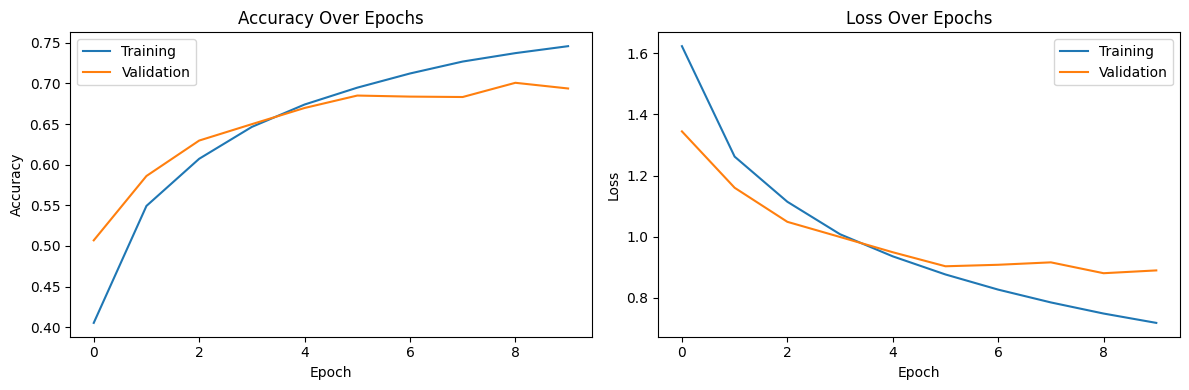

In [14]:
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


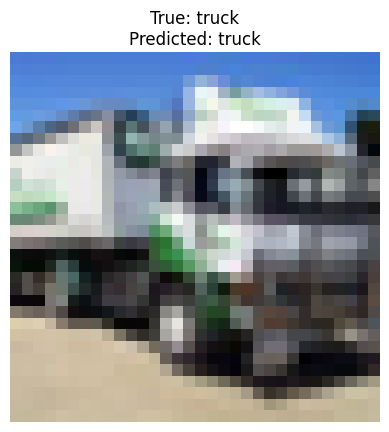

In [21]:
import random

# Select a random image from the test set
index = random.randint(0, len(x_test) - 1)
image = x_test[index]
true_label = np.argmax(y_test[index])

# Make a prediction
prediction = model.predict(image.reshape(1, 32, 32, 3))
predicted_label = np.argmax(prediction)

# Display the image and prediction result
plt.imshow(image)
plt.title(f"True: {class_names[true_label]}\nPredicted: {class_names[predicted_label]}")
plt.axis('off')
plt.show()
